#### Aula 06 - Modelo de regressão múltipla – Parte 2

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
print('Bibliotecas importadas com sucesso!')

Bibliotecas importadas com sucesso!


##### Anotações
- k = número de preditores
- QME = SQE / (n - k - 1) - objetivo é obter o menor valor possível de QME
- QMT = SQT / (n - 1)
- R2_ajustado = 1 - QME / QMT
- Ck = SQE / s2 + 2 * (k + 1) - n (desejável um valor pequeno de Ck)

##### Exercício 01

In [5]:
df_cars = pd.read_csv('carst.csv')
# Filtrar os carros com motor aspirado e que não sejam de 2 cilindros
df_cars_aspirado = df_cars[(df_cars['Etype'] == 0) & (df_cars['nu_cy'] != 2)]   
df_cars_aspirado

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0
10,Mercedes-Benz CLS 350 3.5 V6 2012,3498,6.6,306,1735,6.1,6,0


In [11]:
# y_pred = consumo
# xi_pred = cap_vol, power, weight
x_pred = sm.add_constant(df_cars_aspirado[['cap_vol', 'power', 'weight']])
y_pred = df_cars_aspirado['consumo']
modelo = sm.OLS(y_pred, x_pred, hasconst=True).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     18.17
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           0.000369
Time:                        13:42:55   Log-Likelihood:                -18.408
No. Observations:                  13   AIC:                             44.82
Df Residuals:                       9   BIC:                             47.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8973      1.640      8.475      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
# Teste de hipótese para determinar a significância do modelo
print('Hipótese nula: H0: β1 = β2 = β3 = 0')
print('Hipótese alternativa: H1: pelo menos um βi é diferente de 0\n')
n = len(df_cars_aspirado)
k = 3
gl = n - k - 1
alpha = 0.1
R_quadrado = modelo.rsquared
F_atual = modelo.fvalue
print('F atual =', F_atual)
F_atual_calc = (R_quadrado/k)/((1-R_quadrado)/gl)
print('F atual calculado =', F_atual_calc)
F_crit = stats.f.ppf(q=1-alpha, dfn=k, dfd=gl)
print('F crítico =', F_crit, '\n')
print('Como F_atual é maior que F_crit, rejeitamos H0 e concluímos que o modelo é significativo.')

Hipótese nula: H0: β1 = β2 = β3 = 0
Hipótese alternativa: H1: pelo menos um βi é diferente de 0

F atual = 18.17414462953642
F atual calculado = 18.174144629536425
F crítico = 2.812862997182388 

Como F_atual é maior que F_crit, rejeitamos H0 e concluímos que o modelo é significativo.


In [27]:
# Realizar teste de hipótese para cada parâmetro do modelo
t_crit = stats.t.ppf(q=1-alpha/2, df=gl)
print('t_crit =', t_crit, '\n')
t_beta_0 = modelo.params[0]/modelo.bse[0]
t_beta_1 = modelo.params[1]/modelo.bse[1]
t_beta_2 = modelo.params[2]/modelo.bse[2]
t_beta_3 = modelo.params[3]/modelo.bse[3]
print('t_beta_0 =', t_beta_0)
print('t_beta_1 =', t_beta_1)
print('t_beta_2 =', t_beta_2)
print('t_beta_3 =', t_beta_3, '\n')

t_crit = 1.8331129326536333 

t_beta_0 = 8.475371747596164
t_beta_1 = -0.4171897579767753
t_beta_2 = -0.3780747342909911
t_beta_3 = -1.46447314066769 



In [28]:
# Adicionar o nu_cy ao modelo
x_pred = sm.add_constant(df_cars_aspirado[['cap_vol', 'power', 'weight', 'nu_cy']])
y_pred = df_cars_aspirado['consumo']
modelo = sm.OLS(y_pred, x_pred, hasconst=True).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     85.91
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.32e-06
Time:                        13:55:56   Log-Likelihood:                -6.5200
No. Observations:                  13   AIC:                             23.04
Df Residuals:                       8   BIC:                             25.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0213      1.437     15.329      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
print('Provavelmente existe multicolinaridade entre as variáveis cap_vol e nu_cy\n')

# Teste de significância do modelo
print('Hipótese nula: H0: β1 = β2 = β3 = β4 = 0')
print('Hipótese alternativa: H1: pelo menos um βi é diferente de 0\n')
n = len(df_cars_aspirado)
k = 4
gl = n - k - 1
alpha = 0.1
R_quadrado = modelo.rsquared
F_atual = modelo.fvalue
print('F atual =', F_atual)
F_crit = stats.f.ppf(q=1-alpha, dfn=k, dfd=gl)
print('F crítico =', F_crit, '\n')

print('Como F_atual é maior que F_crit, rejeitamos H0 e concluímos que o modelo é significativo.')

Provavelmente existe multicolinaridade entre as variáveis cap_vol e nu_cy

Hipótese nula: H0: β1 = β2 = β3 = β4 = 0
Hipótese alternativa: H1: pelo menos um βi é diferente de 0

F atual = 85.90940937703053
F crítico = 2.806425706137641 

Como F_atual é maior que F_crit, rejeitamos H0 e concluímos que o modelo é significativo.


In [33]:
t_crit = stats.t.ppf(q=1-alpha/2, df=gl)
print('t_crit =', t_crit, '\n')
print('Somente o parâmetro β1 não é significativo, pois seu t calculado é menor que t_crit.\n') 

t_crit = 1.8595480375228421 

Somente o parâmetro β1 não é significativo, pois seu t calculado é menor que t_crit.



In [34]:
print('Agora é necessário refazer a análise retirando o parametro β1 (cap_vol) do modelo.\n')
x_pred = sm.add_constant(df_cars_aspirado[['power', 'weight', 'nu_cy']])
y_pred = df_cars_aspirado['consumo']
modelo = sm.OLS(y_pred, x_pred, hasconst=True).fit()
print(modelo.summary())

Agora é necessário refazer a análise retirando o parametro β1 (cap_vol) do modelo.

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     124.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.19e-07
Time:                        14:02:01   Log-Likelihood:                -6.7184
No. Observations:                  13   AIC:                             21.44
Df Residuals:                       9   BIC:                             23.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
# Criar gráfico de dispersão e resíduos
y_pred = list(modelo.predict())
residuos = list(modelo.resid)
# Criar instância influente
influencia = modelo.get_influence()
# Obter resíduos padronizados / normalizados / standardizados
standardized_residuals = list(influencia.resid_studentized_internal)
proporcao_e_e_estrela = np.divide(residuos, standardized_residuals) # e/e*

# Criar dataframe com os dados
df_cars_y_pred_residuos = pd.DataFrame({'Consumo Real': df_cars_aspirado['consumo'],'Consumo Previsto': y_pred, 'e': residuos, 'e*': standardized_residuals, 'e/e*': proporcao_e_e_estrela})
df_cars_y_pred_residuos

,Consumo Real,Consumo Previsto,e,e*,e/e*
1,10.4,10.345134,0.054866,0.140443,0.390663
2,12.8,12.178190,0.621810,1.617789,0.384358
3,10.3,9.769516,0.530484,1.217066,0.435871
4,10.5,10.791847,-0.291847,-0.675226,0.432221
5,8.5,9.113044,-0.613044,-1.359483,0.450939
6,9.5,10.046835,-0.546835,-1.228797,0.445017
7,9.2,9.621654,-0.421654,-0.927807,0.454463
8,6.5,6.392115,0.107885,0.272351,0.396125
9,7.1,6.624970,0.475030,1.067406,0.445033
10,6.6,6.707464,-0.107464,-0.252444,0.425695


c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


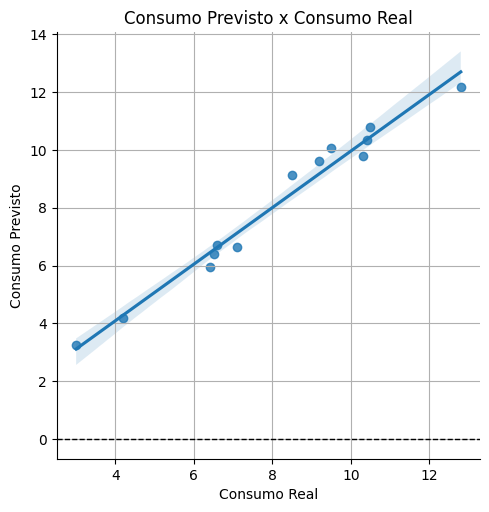

In [48]:
sns.lmplot(x='Consumo Real', y='Consumo Previsto', data=df_cars_y_pred_residuos, aspect=1)
plt.title('Consumo Previsto x Consumo Real')
plt.xlabel('Consumo Real')
plt.ylabel('Consumo Previsto')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid()
plt.show()

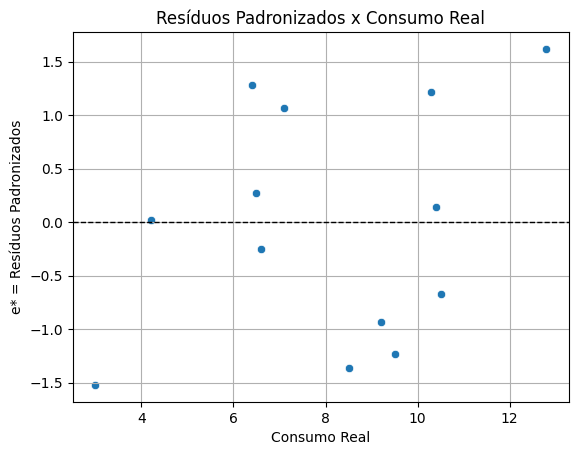

In [52]:
# Gráfico de diagnóstico (resíduos padronizados vs Consumo Real)
sns.scatterplot(x='Consumo Real', y='e*', data=df_cars_y_pred_residuos)
plt.title('Resíduos Padronizados x Consumo Real')
plt.xlabel('Consumo Real')
plt.ylabel('e* = Resíduos Padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid()
plt.show()

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


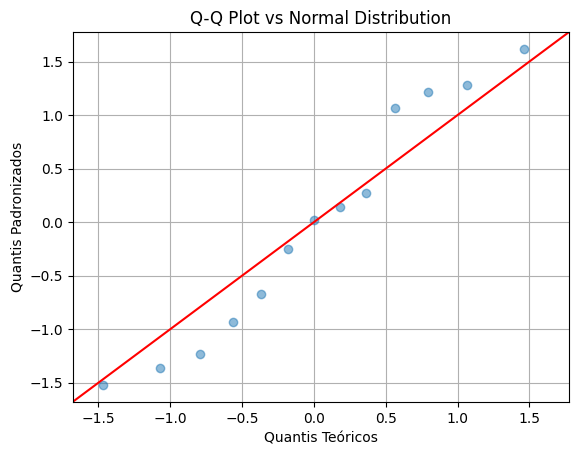

In [55]:
# Gráfico de diagnóstico - verificação da normalidade dos resíduos - Q-Q Plot vs Normal Distribution
QQ = ProbPlot(influencia.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Q-Q Plot vs Normal Distribution')
plot_lm_2.axes[0].set_xlabel('Quantis Teóricos')
plot_lm_2.axes[0].set_ylabel('Quantis Padronizados')
plt.grid()
plt.show()

In [59]:
influencia_2 = modelo.get_influence()
print(influencia_2.hat_matrix_diag)
print('\n')
# Valores dos resíduos padronizados (influências internas)
# residuos = modelo.resid.as_matrix()
leviers = influencia_2.hat_matrix_diag
sigma_err = np.sqrt(modelo.scale)
res_stds = standardized_residuals/(sigma_err*np.sqrt(1.0-leviers))
print(res_stds)

[0.35806038 0.37861409 0.20088976 0.21422029 0.14468658 0.16700463
 0.13126423 0.33998544 0.16694511 0.23776741 0.32914283 0.46714838
 0.86427087]


[ 0.35949995  4.20906954  2.79225934 -1.5622264  -3.01478277 -2.7612392
 -2.04154318  0.68753833  2.39848859 -0.59301501  0.05304166  3.59442848
 -8.46147643]


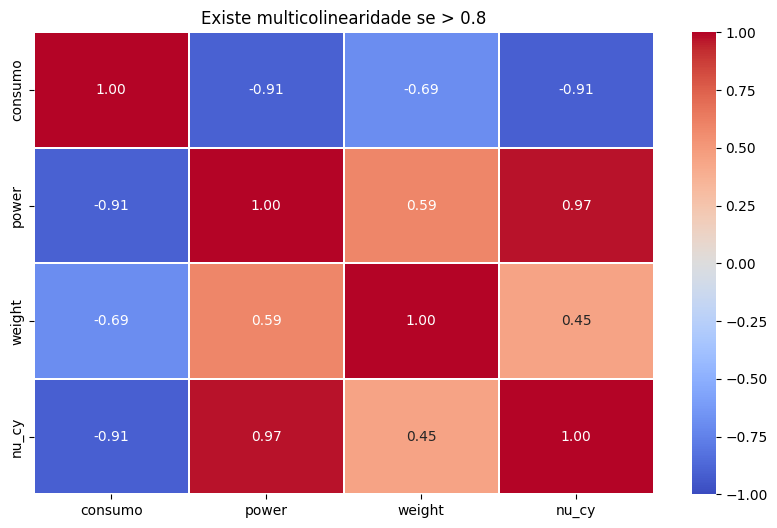

In [67]:
# Calcular correlação entre os atributos numéricos
corr = df_cars_aspirado[['consumo', 'power', 'weight', 'nu_cy']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1, vmin=-1, vmax=1)
plt.title('Existe multicolinearidade se > 0.8')
plt.show()

In [66]:
print('Existe multicolinearidade se > 0.8')
print(corr)

print('\nExiste multicolinearidade se a relação > R2. Lembrando que R2 ajustado é igual a 0,969')
mc2 = corr ** 2
print(mc2)

print('\nExiste multicolinearidade se VIF > 4')
vif = np.linalg.inv(mc2)
print(vif)  


Existe multicolinearidade se > 0.8
          consumo     power    weight     nu_cy
consumo  1.000000 -0.905766 -0.687542 -0.913702
power   -0.905766  1.000000  0.592254  0.968908
weight  -0.687542  0.592254  1.000000  0.445695
nu_cy   -0.913702  0.968908  0.445695  1.000000

Existe multicolinearidade se a relação > R2. Lembrando que R2 ajustado é igual a 0,969
          consumo     power    weight     nu_cy
consumo  1.000000  0.820412  0.472714  0.834851
power    0.820412  1.000000  0.350764  0.938783
weight   0.472714  0.350764  1.000000  0.198644
nu_cy    0.834851  0.938783  0.198644  1.000000

Existe multicolinearidade se VIF > 4
[[  4.94510596   0.86342415  -1.727545    -4.59582941]
 [  0.86342415  11.18956754  -2.18959009 -10.79045883]
 [ -1.727545    -2.18959009   1.96748437   3.10696401]
 [ -4.59582941 -10.79045883   3.10696401  14.34955472]]


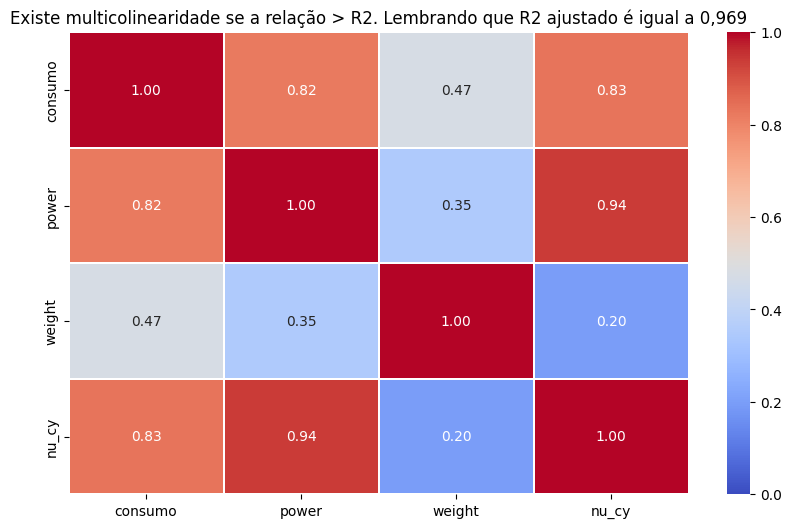

In [69]:
plt.figure(figsize=(10, 6))
sns.heatmap(mc2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1, vmin=0, vmax=1)
plt.title('Existe multicolinearidade se a relação > R2. Lembrando que R2 ajustado é igual a 0,969')
plt.show()

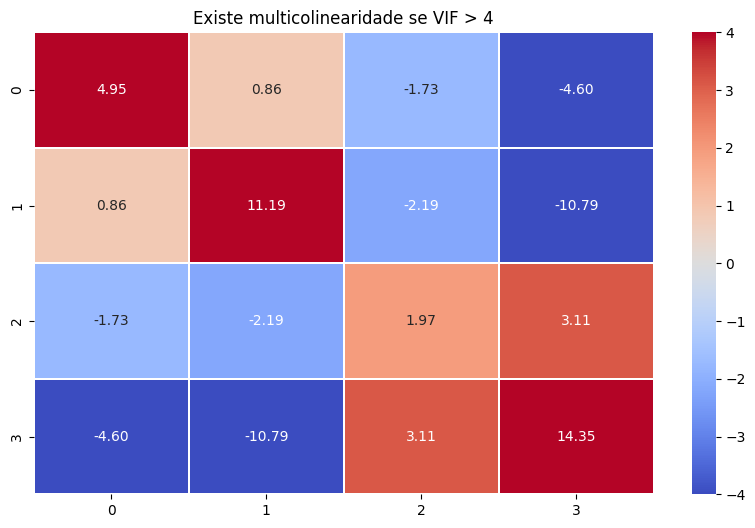

In [70]:
plt.figure(figsize=(10, 6))
sns.heatmap(vif, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1, vmin=-4, vmax=4)
plt.title('Existe multicolinearidade se VIF > 4')
plt.show()